In [2]:
# Check protobuf implementation
from google.protobuf.internal import api_implementation
api_implementation.Type()

'cpp'

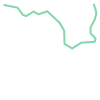

In [4]:
from shapely.geometry import LineString

line1 = LineString([
    [-122.48369693756104, 37.83381888486939],
    [-122.48348236083984, 37.83317489144141],
    [-122.48339653015138, 37.83270036637107],
    [-122.48356819152832, 37.832056363179625],
    [-122.48404026031496, 37.83114119107971],
    [-122.48404026031496, 37.83049717427869],
    [-122.48348236083984, 37.829920943955045],
    [-122.48356819152832, 37.82954808664175],
    [-122.48507022857666, 37.82944639795659],
    [-122.48610019683838, 37.82880236636284],
    [-122.48695850372314, 37.82931081282506],
    [-122.48700141906738, 37.83080223556934],
    [-122.48751640319824, 37.83168351665737],
    [-122.48803138732912, 37.832158048267786],
    [-122.48888969421387, 37.83297152392784],
    [-122.48987674713133, 37.83263257682617],
    [-122.49043464660643, 37.832937629287755],
    [-122.49125003814696, 37.832429207817725],
    [-122.49163627624512, 37.832564787218985],
    [-122.49223709106445, 37.83337825839438],
    [-122.49378204345702, 37.83368330777276]
])
line1

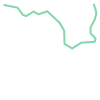

In [5]:
from shapely.geometry import GeometryCollection

geometries = [
    line1,
]
g = GeometryCollection(geometries)
g

In [12]:
from geotable.projections import (
    get_transform_shapely_geometry,
    LONGITUDE_LATITUDE_PROJ4,
    SPHERICAL_MERCATOR_PROJ4)
transform = get_transform_shapely_geometry(
    LONGITUDE_LATITUDE_PROJ4, SPHERICAL_MERCATOR_PROJ4)
transformed_g = transform(g)

In [8]:
transformed_g.wkt

'GEOMETRYCOLLECTION (LINESTRING (-13634822.77356694 4555976.520480986, -13634798.8869956 4555885.751509896, -13634789.33236706 4555818.869110146, -13634808.44162413 4555728.100139057, -13634860.99208108 4555599.112653832, -13634860.99208108 4555508.343682738, -13634798.8869956 4555427.129340184, -13634808.44162413 4555374.578883236, -13634975.64762351 4555360.246940433, -13635090.30316594 4555269.477969347, -13635185.84945129 4555341.137683365, -13635190.62676556 4555551.339511146, -13635247.95453678 4555675.549682113, -13635305.28230799 4555742.432081861, -13635400.82859335 4555857.087624287, -13635510.7068215 4555809.31448161, -13635572.81190699 4555852.310310024, -13635663.58087807 4555780.650596006, -13635706.57670649 4555799.759853075, -13635773.45910623 4555914.415395503, -13635945.44241988 4555957.411223917))'

In [21]:
transform(line1).wkt

'LINESTRING (-13634822.77356694 4555976.520480986, -13634798.8869956 4555885.751509896, -13634789.33236706 4555818.869110146, -13634808.44162413 4555728.100139057, -13634860.99208108 4555599.112653832, -13634860.99208108 4555508.343682738, -13634798.8869956 4555427.129340184, -13634808.44162413 4555374.578883236, -13634975.64762351 4555360.246940433, -13635090.30316594 4555269.477969347, -13635185.84945129 4555341.137683365, -13635190.62676556 4555551.339511146, -13635247.95453678 4555675.549682113, -13635305.28230799 4555742.432081861, -13635400.82859335 4555857.087624287, -13635510.7068215 4555809.31448161, -13635572.81190699 4555852.310310024, -13635663.58087807 4555780.650596006, -13635706.57670649 4555799.759853075, -13635773.45910623 4555914.415395503, -13635945.44241988 4555957.411223917)'

In [15]:
import mercantile
mercantile.bounds(1, 1, 2)

LngLatBbox(west=-90.0, south=0.0, east=0.0, north=66.51326044311186)

In [16]:
g.bounds

(-122.49378204345702,
 37.82880236636284,
 -122.48339653015138,
 37.83381888486939)

In [17]:
transformed_g.bounds

(-13635945.442419875,
 4555269.4779693475,
 -13634789.332367064,
 4555976.520480986)

In [18]:
import mapbox_vector_tile as mvt

In [22]:
transformed_geometry = transform(line1)
mvt.encode([{
    'name': 'example',
    'features': [{
        'geometry': transformed_geometry,
        'properties': {},        
    }],
}], quantize_bounds=transformed_geometry.bounds)

b'\x1af\n\x07example\x12V\x18\x02"R\t\x94>\x00\xa2\x01\xa8\x01\x9c\x08D\x86\x06\x87\x01\x9c\x08\xf3\x02\xd6\x0b\x00\x9c\x08\xb8\x03\xae\x07C\xe0\x04\x9f\t\xa6\x01\xab\x06\x9c\x08\xa5\x05\xbd\x06!\x83\x13\x95\x03\x9d\x0b\x95\x03\x87\x06\xa3\x05\xaf\n\x8b\x06\xaa\x04\xb7\x03\xf1\x03\x81\x05\xbe\x06\xb1\x02\xdd\x01\xd9\x03\xaf\n\xc1\t\xf1\x03(\x80 x\x01'

In [28]:
longitude, latitude = line1.centroid.coords[0]

In [32]:
mercantile.tile(longitude, latitude, zoom=8)

Tile(x=40, y=98, z=8)

In [34]:
tile_bounds = mercantile.bounds(40, 90, 8)

In [35]:
tile_bounds

LngLatBbox(west=-123.75, south=46.07323062540836, east=-122.34375, north=47.04018214480666)

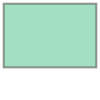

In [39]:
from shapely.geometry import box
box(*tile_bounds)